In [2]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics._classification import classification_report

# Tell the time network on smaller Dataset
## Starting with regression approach

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [4]:
X = np.load('A1_data_150/images.npy')
X = X/255
y = np.load('A1_data_150/labels.npy')

## Classification

In [ ]:
y_30_min_bins = np.array([int(round((i *60 +j)/30,0)) for i,j in y])
y_20_min_bins = np.array([int(round((i *60 +j)/20,0)) for i,j in y])
y_10_min_bins = np.array([int(round((i *60 +j)/10,0)) for i,j in y])
y_1_min_bins = np.array([int((i *60 +j)) for i,j in y])

n_epochs = 50

In [6]:
y_clas = y_30_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [ ]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=5))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.05))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762532637.485675     826 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:07:00.0, compute capability: 8.6


In [ ]:
hist_clas_30 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_data=(X_clas_test,y_clas_test),
    epochs=n_epochs,
    batch_size=32
)

model_class_30 = keras.models.clone_model(model_class)
model_class_30.set_weights(model_class.weights)

Epoch 1/50


I0000 00:00:1762532649.639608    2405 service.cc:152] XLA service 0x7056ac002310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762532649.639654    2405 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-11-07 17:24:09.698900: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762532649.926679    2405 cuda_dnn.cc:529] Loaded cuDNN version 90101


 25/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.4052

I0000 00:00:1762532654.320903    2405 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2477

2025-11-07 17:24:22.046909: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 4 bytes spill stores, 4 bytes spill loads

2025-11-07 17:24:22.222674: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_104', 12 bytes spill stores, 12 bytes spill loads



507/507 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 3.2272 - val_loss: 3.2159
Epoch 2/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2139 - val_loss: 3.2120
Epoch 3/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2102 - val_loss: 3.2110
Epoch 4/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2118 - val_loss: 3.2113
Epoch 5/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.5613 - val_loss: 3.2113
Epoch 6/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.8900 - val_loss: 3.2112
Epoch 7/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.5988 - val_loss: 3.2113
Epoch 8/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.2900 - val_loss: 3.2115
Epoch 9/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.2531 - val_loss: 3.2114
Epoch 10/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2073 - val_loss: 3.2116
Epoch 11/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2074 - val_loss: 3.2117
Epoch 12/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 

## 20 Minute Bins

In [ ]:
y_clas = y_20_min_bins
X_clas_train, X_clas_test, y_clas_train, y_clas_test = train_test_split(X,y_clas, test_size=0.1) 

shape = X_clas_train.shape[1:]
input_shape = shape + (1,)
output_nodes = max(y_clas) +1 
model_class = keras.Sequential()

In [ ]:
model_class.add(layers.Conv2D(filters=16,kernel_size=5,input_shape = input_shape))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=32, kernel_size=5))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.Conv2D(filters=64, kernel_size=3))
model_class.add(layers.MaxPooling2D(2))

model_class.add(layers.Flatten())
model_class.add(layers.Dense(256, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(128, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(64, activation="relu"))
model_class.add(layers.Dropout(0.15))

model_class.add(layers.Dense(output_nodes, activation="softmax"))

model_class.compile(optimizer="adam",loss="sparse_categorical_crossentropy" )

In [ ]:
hist_clas_20 = model_class.fit(
    X_clas_train,y_clas_train,
    validation_data=(X_clas_test,y_clas_test),
    epochs=n_epochs,
    batch_size=32
)

model_class_20 = keras.models.clone_model(model_class)
model_class_20.set_weights(model_class.weights)

## Evaluation

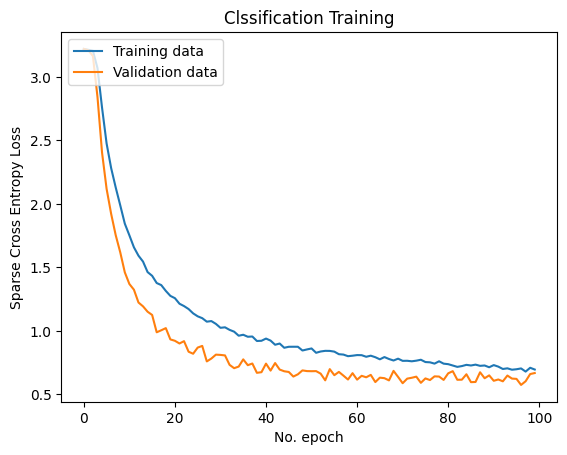

In [50]:
import matplotlib.pyplot as plt 

plt.plot(hist_clas.history['loss'], label='Training data')
plt.plot(hist_clas.history['val_loss'], label='Validation data')
plt.title('Clssification Training')
plt.ylabel('Sparse Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        48
           1       0.79      0.82      0.81        66
           2       0.61      0.79      0.69        81
           3       0.80      0.82      0.81        67
           4       0.86      0.61      0.72        83
           5       0.86      0.84      0.85        79
           6       0.73      0.87      0.80        63
           7       0.92      0.78      0.84        69
           8       0.85      0.72      0.78        81
           9       0.78      0.76      0.77        83
          10       0.75      0.84      0.79        88
          11       0.68      0.90      0.78        72
          12       0.87      0.77      0.82        71
          13       0.90      0.59      0.71        75
          14       0.86      0.86      0.86        76
          15       0.63      0.86      0.73        64
          16       0.90      0.86      0.